# Aprendizado por Reforço

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

if IS_COLAB or IS_KAGGLE:
    !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
    %pip install -U tf-agents pyvirtualdisplay
    %pip install -U gym~=0.21.0
    %pip install -U gym[box2d,atari,accept-rom-license]

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


No GPU was detected. CNNs can be very slow without a GPU.


In [43]:
from IPython.display import clear_output


In [240]:
import gym

In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import time

In [242]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Concatenate, Flatten, Input
from tensorflow.keras.models import Model, Sequential

In [243]:
from IPython.display import Image
import imageio

In [244]:
def plot_animation(frames):
    imageio.mimsave('images/cap18/a2c.gif', [np.array(img[0]) for i, img in enumerate(frames) if i%2 == 0], fps=29)
#write_apng('anim.png', frames[0], delay=20)
    img = Image(filename='images/cap18/a2c.gif')
    return img


In [31]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
obs = env.reset()
obs

c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


array([ 0.0321196 , -0.01362908,  0.01285018, -0.01768357], dtype=float32)

In [33]:
gym.envs.registry.all()

c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\envs\registration.py:421: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(


dict_values([EnvSpec(id='CartPole-v0', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=195.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='CartPole', version=0), EnvSpec(id='CartPole-v1', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='CartPole', version=1), EnvSpec(id='MountainCar-v0', entry_point='gym.envs.classic_control.mountain_car:MountainCarEnv', reward_threshold=-110.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='MountainCar', version=0), EnvSpec(id='MountainCarContinuous-v0', entry_point='gym.envs.classic_control.co

In [34]:
env.render()

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [35]:
img = env.render()
img

[]

In [36]:
env.action_space

Discrete(2)

In [37]:
env.step(1)

(array([ 0.03184702,  0.18130626,  0.01249651, -0.30628458], dtype=float32),
 1.0,
 False,
 {})

In [39]:
action = 0
obs, reward, done, info = env.step(action)

In [40]:
obs

array([ 0.03519331, -0.20920426,  0.00617708,  0.28499928], dtype=float32)

In [41]:
def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

In [42]:
totals = []
episode_n = 0

In [45]:
for episode in range(500):
    
    episode_rewards = 0
    obs = env.reset()
    for step in range(200):
        episode_n += 1
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
        totals.append(episode_rewards)

In [46]:
episode_n

21000

In [47]:
import numpy as np

In [48]:
np.mean(totals), np.std(totals), np.min(totals), np.min(totals), np.max(totals)

(21.819836081568933, 13.171078088446814, 1.0, 1.0, 64.0)

In [51]:
#env.seed(42)

frames = []

obs = env.reset()
for step in range(200):
    img = env.render()
    frames.append(img)
    action = basic_policy(obs)
    obs, reward, done, info = env.step(action)
    if done:
        break

In [145]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

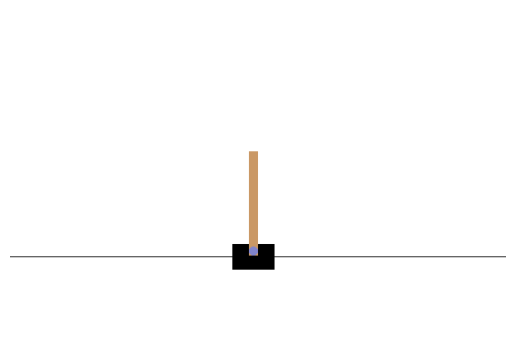

In [59]:
fig = plt.figure()
patch = plt.imshow(frames[0][0])
plt.axis('off')
anim = animation.FuncAnimation(
    fig, update_scene, fargs=(frames, patch),
    frames=len(frames), repeat=False, interval=40)
plt.show()

## Políticas de Rede Neural

In [60]:
n_inputs = 4

In [82]:
model = Sequential()
model.add(Dense(5, activation="elu", input_shape=[n_inputs]))
model.add(Dense(1, activation="sigmoid"))

In [83]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 5)                 25        
                                                                 
 dense_18 (Dense)            (None, 1)                 6         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
def render_policy_net(model, n_max_steps=200, seed=42):
    frames = []
    total_rewards = 0
    env = gym.make("CartPole-v1", render_mode="rgb_array")
    #env.seed(seed)
    np.random.seed(seed)
    obs = env.reset()
    print(obs)
    for step in range(n_max_steps):
        frames.append(env.render())
        left_proba = model.predict(obs.reshape(1, -1))
        action = int(np.random.rand() > left_proba)
        obs, reward, done, info = env.step(action)
        n_step = step
        if done:
            break
    env.close()
    return frames, n_step

In [89]:
render_policy_net(model, n_max_steps=500)
plot_animation(frames[0])

c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


[ 0.00038833  0.00705862  0.04013395 -0.04035627]


In [90]:
step

0

In [91]:
def reward(output, target=0.8):
    return -np.abs(output - target)

In [103]:
def play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        obs = np.array(obs)
        obs = np.expand_dims(obs, axis=0)
        left_proba = model(obs)
        action = (tf.random.uniform([1, 1]) > left_proba)
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
        loss = tf.reduce_mean(loss, model.trainable_variables)
    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, done2, info = env.step(int(action[0, 0].numpy()))
    return obs, reward, done, done2, grads

In [104]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, done2, grads = play_one_step(env, obs, model, loss_fn)
            all_grads.append(grads)
            if done:
                break
        
        all_rewards.append(current_rewards)
        all_grads.append(current_grads)
    return all_rewards, all_grads

In [105]:
def discount_rewards(rewards, discount_factor):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_factor

    return discounted

In [106]:
def discount_rewards(rewards, discount_rate):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_rate
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

In [107]:
discount_rewards([10, 0, -50], discount_rate=0.8)

array([-22, -40, -50])

In [108]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_rate = 0.95

In [109]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
loss_fn = keras.losses.binary_crossentropy

In [110]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[4]),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [111]:
n_environments = 50
n_iterations = 5000

envs = [gym.make("CartPole-v1", render_mode="rgb_array") for _ in range(n_environments)]
for index, env in enumerate(envs):
    #env.seed(index)
    pass
np.random.seed(42)
observations = [env.reset() for env in envs]
optimizer = keras.optimizers.RMSprop()
loss_fn = keras.losses.binary_crossentropy

for iteration in range(n_iterations):
    # if angle < 0, we want proba(left) = 1., or else proba(left) = 0.
    target_probas = np.array([([1.] if obs[0][2] < 0 else [0.])
                              for obs in observations])
    with tf.GradientTape() as tape:
        left_probas = model(np.array(observations, dtype=float))
        loss = tf.reduce_mean(loss_fn(target_probas, left_probas))
    print("\rIteration: {}, Loss: {:.3f}".format(iteration, loss.numpy()), end="")
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    actions = (np.random.rand(n_environments, 1) > left_probas.numpy()).astype(np.int32)
    for env_index, env in enumerate(envs):
        obs, reward, done, done2, info = env.step(actions[env_index][0])
        observations[env_index] = obs if not done else env.reset()

for env in envs:
    env.close()

c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


IndexError: invalid index to scalar variable.

In [102]:
model = Sequential([
    Dense(5, activation="elu", input_shape=(4,)),
    Dense(1, activation="sigmoid"),
])


In [73]:
input_data = tf.constant([[0.15762584, -0.03373126, -0.2109796, -0.07928764]], dtype=tf.float32)
predictions = model(input_data)

In [74]:
predictions

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.4257382]], dtype=float32)>

In [84]:
env = gym.make("CartPole-v1")
#env.seed(42);

for iteration in range(n_iterations):
    all_rewards, all_grads = play_multiple_episodes(
        env, n_episodes_per_update, n_max_steps, model, loss_fn)
    total_rewards = sum(map(sum, all_rewards))                     # Not shown in the book
    print("\rIteration: {}, mean rewards: {:.1f}".format(          # Not shown
        iteration, total_rewards / n_episodes_per_update), end="") # Not shown
    all_final_rewards = discount_and_normalize_rewards(all_rewards,
                                                       discount_rate)
    all_mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
                 for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

env.close()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

## DQN

In [125]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [126]:
from tensorflow.keras.optimizers.legacy import Adam

In [8]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

states = env.observation_space.shape[0]
actions = env.action_space.n

c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [9]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

episodes = 20

frames = []
for episode in range(episodes + 1):
    obs = env.reset()
    done = False
    score = 0
    while not done:
        action = random.choice([0, 1])
        obs, reward, done, info = env.step(action)
        score += reward
        frames.append(env.render())
    print(f"Episode {episode}, Score {score}")

env.close()


Episode 0, Score 31.0
Episode 1, Score 23.0
Episode 2, Score 13.0
Episode 3, Score 30.0
Episode 4, Score 20.0
Episode 5, Score 18.0
Episode 6, Score 23.0
Episode 7, Score 32.0
Episode 8, Score 10.0
Episode 9, Score 20.0
Episode 10, Score 22.0
Episode 11, Score 18.0
Episode 12, Score 14.0
Episode 13, Score 16.0
Episode 14, Score 24.0
Episode 15, Score 11.0
Episode 16, Score 30.0
Episode 17, Score 16.0
Episode 18, Score 14.0
Episode 19, Score 20.0
Episode 20, Score 14.0


In [112]:
plot_animation(frames[0])

In [10]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

In [11]:
states = env.observation_space.shape[0]
actions = env.action_space.n

In [12]:
states

4

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(1, states)))
model.add(Dense(24, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dense(actions, activation="linear"))

In [14]:
agent = DQNAgent(
    model=model,
    memory=SequentialMemory(limit=50000, window_length=1),
    policy=BoltzmannQPolicy(),
    nb_actions=actions,
    nb_steps_warmup=10,
    target_model_update=0.01
)

In [15]:
agent.compile(optimizer=Adam(), metrics=["mae"])

In [16]:
env

<TimeLimit<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>>

In [17]:
agent.fit(env, nb_steps=10000, visualize=False, verbose=1)

Training for 10000 steps ...
Interval 1 (0 steps performed)


    1/10000 [..............................] - ETA: 35:50 - reward: 1.0000

c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)


   32/10000 [..............................] - ETA: 3:39 - reward: 1.0000

c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 12 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 13 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 14 + 1) instead
  batch_idx

10000/10000 [==============================] - 79s 8ms/step - reward: 1.0000
done, took 79.281 seconds


In [18]:
results = agent.test(env, nb_episodes=10, visualize=True)

Testing for 10 episodes ...


c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode 1: reward: 155.000, steps: 155
Episode 2: reward: 104.000, steps: 104
Episode 3: reward: 153.000, steps: 153
Episode 4: reward: 220.000, steps: 220
Episode 5: reward: 143.000, steps: 143
Episode 6: reward: 251.000, steps: 251
Episode 7: reward: 206.000, steps: 206
Episode 8: reward: 245.000, steps: 245
Episode 9: reward: 249.000, steps: 249
Episode 10: reward: 274.000, steps: 274


In [19]:
print(np.mean(results.history["episode_reward"]))

200.0


In [20]:
env.close()

<Axes: >

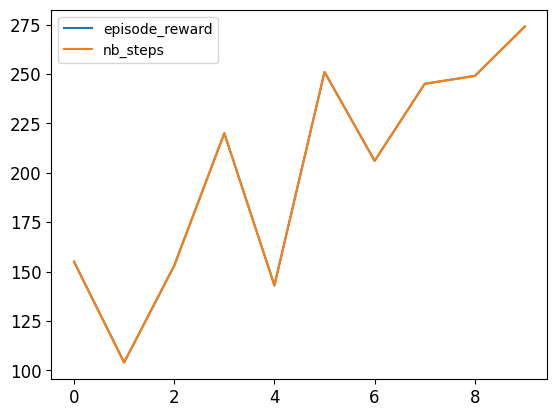

In [21]:
pd.DataFrame(results.history).plot()

In [22]:
agent.test(env)

Testing for 1 episodes ...


c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode 1: reward: 247.000, steps: 247


In [165]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

episodes = 20


for episode in range(episodes + 1):
    frames = []
    obs = env.reset()
    done = False
    score = 0
    while not done:
        frame = env.render()
        action = agent.forward(obs)
        obs, reward, done, info = env.step(action)
        score += reward
        frames.append(frame)
    print(f"Episode {episode}, Score {score}")

env.close()


c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Episode 0, Score 135.0
Episode 1, Score 308.0
Episode 2, Score 105.0
Episode 3, Score 319.0
Episode 4, Score 198.0
Episode 5, Score 149.0
Episode 6, Score 129.0
Episode 7, Score 326.0
Episode 8, Score 450.0
Episode 9, Score 397.0
Episode 10, Score 295.0
Episode 11, Score 367.0
Episode 12, Score 245.0
Episode 13, Score 156.0
Episode 14, Score 115.0
Episode 15, Score 110.0
Episode 16, Score 115.0
Episode 17, Score 315.0
Episode 18, Score 299.0
Episode 19, Score 348.0
Episode 20, Score 164.0


In [167]:
import matplotlib.pyplot as plt
from matplotlib import animation

def update_scene(num, frames, patch, episode=1):
    patch.set_array(frames[num][0])  # Remova a dimensão extra
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0][0])  # Remova a dimensão extra
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=100, repeat=repeat, interval=interval)
    plt.show()  # Remova a linha que fecha a figura
    return anim

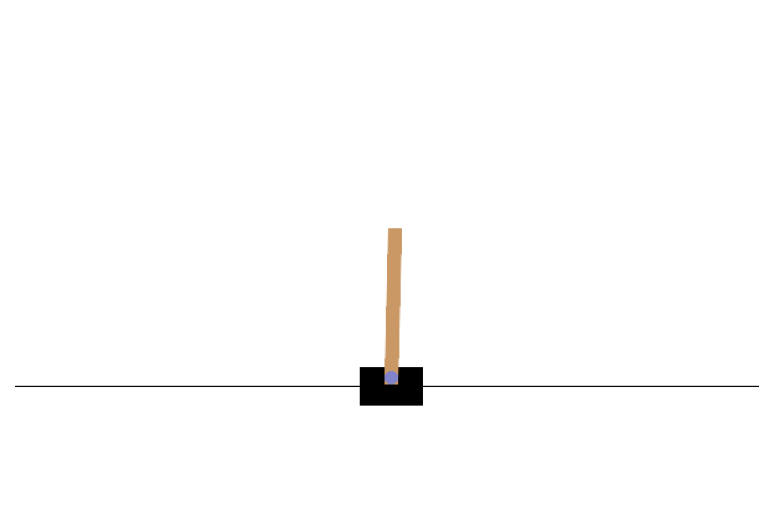

In [168]:
plot_animation(frames, repeat=True)

## Processo de Decisão de Markov

## Deep Q-Learning

In [7]:
env = gym.make("CartPole-v0", render_mode="rgb_array")
input_shape=[4]
n_outputs = 2

c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\envs\registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [8]:
model = Sequential([
    Dense(32, activation="elu", input_shape=input_shape),
    Dense(32, activation="elu"),
    Dense(n_outputs)
])

In [9]:
def epsilon_greedy_policy(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(2)
    else:
        Q_values = model.predict(state[np.newaxis])
        return np.argmax(Q_values[0])

In [10]:
from collections import deque

In [11]:
replay_buffer = deque(maxlen=2000)

In [12]:
def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_buffer), size=batch_size)
    batch = [replay_buffer[index] for index in indices]
    states, actions, rewards, next_states, dones = [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(5)]
    return states, actions, rewards, next_states, dones

In [13]:
def play_one_step(env, state, epsilon):
    action = epsilon_greedy_policy(state, epsilon)
    next_state, reward, done, info = env.step(action)
    replay_buffer.append((state, action, reward, next_state, done))
    return next_state, reward, done, info

In [14]:
batch_size = 32
discount_factor = 0.95
optimizer = keras.optimizers.Adam(lr=1e-3)
loss_fn = keras.losses.mean_squared_error

In [15]:
def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones = experiences
    next_Q_values = model.predict(next_states)
    max_next_Q_values = np.max(next_Q_values, axis=1)
    target_Q_values = (rewards + (1 - dones) * discount_factor * max_next_Q_values)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [16]:
for episode in range(600):
    obs = env.reset()
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info = play_one_step(env, obs, epsilon)
        if done:
            break
    if episode > 50:
        training_step(batch_size)

1/1 [==============================] - 0s 21ms/step


In [20]:
obs

array([ 0.15396295,  1.7525988 , -0.25919   , -2.8831294 ], dtype=float32)

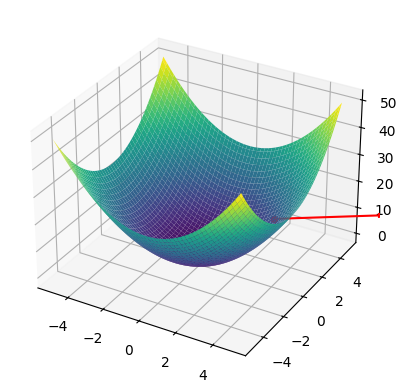

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Função
def f(x, y):
    return x**2 + y**2

# Criar grade de pontos
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plotar superfície
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Ponto específico (3, 2, f(3, 2))
point = np.array([3, 2, f(3, 2)])
ax.scatter(*point, color='red')

# Gradiente
gradient_at_point = np.array([2 * point[0], 2 * point[1], 0])
ax.quiver(*point, *gradient_at_point, color='red')

plt.show()

## Variantes do Deep Q-Learning

### Alvos Fixos do Q-Valor

In [257]:
from tf_agents.environments import suite_gym
import ale_py
# if using gymnasium
import shimmy

import gymnasium as gym # or "import gymnasium as gym"

In [258]:
env = gym.make("LunarLander-v2")

DependencyNotInstalled: Box2D is not installed, run `pip install gymnasium[box2d]`

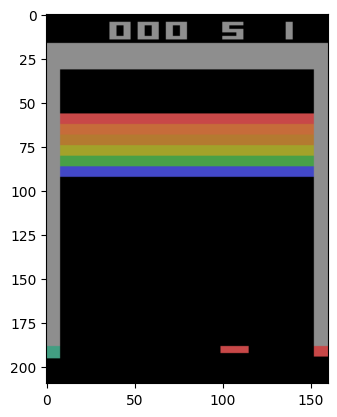

In [232]:
plt.imshow(env.reset()[0])

In [245]:
env = gym.make("Pendulum-v1", render_mode="rgb_array")

In [248]:
states = env.observation_space.shape[0]
actions = env.action_space

In [249]:
states, actions

(3, Box(-2.0, 2.0, (1,), float32))

In [250]:
model = Sequential()
model.add(Flatten(input_shape=(1, states)))
model.add(Dense(24, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dense(1, activation="linear"))

In [252]:
agent = DQNAgent(
    model=model,
    memory=SequentialMemory(limit=50000, window_length=1),
    policy=BoltzmannQPolicy(),
    nb_actions=1,
    nb_steps_warmup=10,
    target_model_update=0.01
)

In [253]:
agent.compile(Adam(), ["accuracy"])

In [254]:
agent.fit(env, nb_steps=1000)

Training for 1000 steps ...
Interval 1 (0 steps performed)


c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


IndexError: invalid index to scalar variable.